# 🤖 Supervised and Unsupervised Learning in Machine Learning

Machine Learning is the science of making computers learn and act like humans by feeding data and information without being explicitly programmed.

Machine learning algorithms are trained with training data. When new data comes in, they can make predictions and decisions accurately based on past data. 

For example, whenever you ask Siri to do something, a powerful speech recognition converts the audio into its corresponding textual form. This is sent to the Apple servers for further processing where language processing algorithms are run to understand the user's intent. Then finally, Siri tells you the answer. 

There are **two types** of machine learning:

1. Supervised Learning
2. Unsupervised Learning

In [1]:
from IPython.display import Image

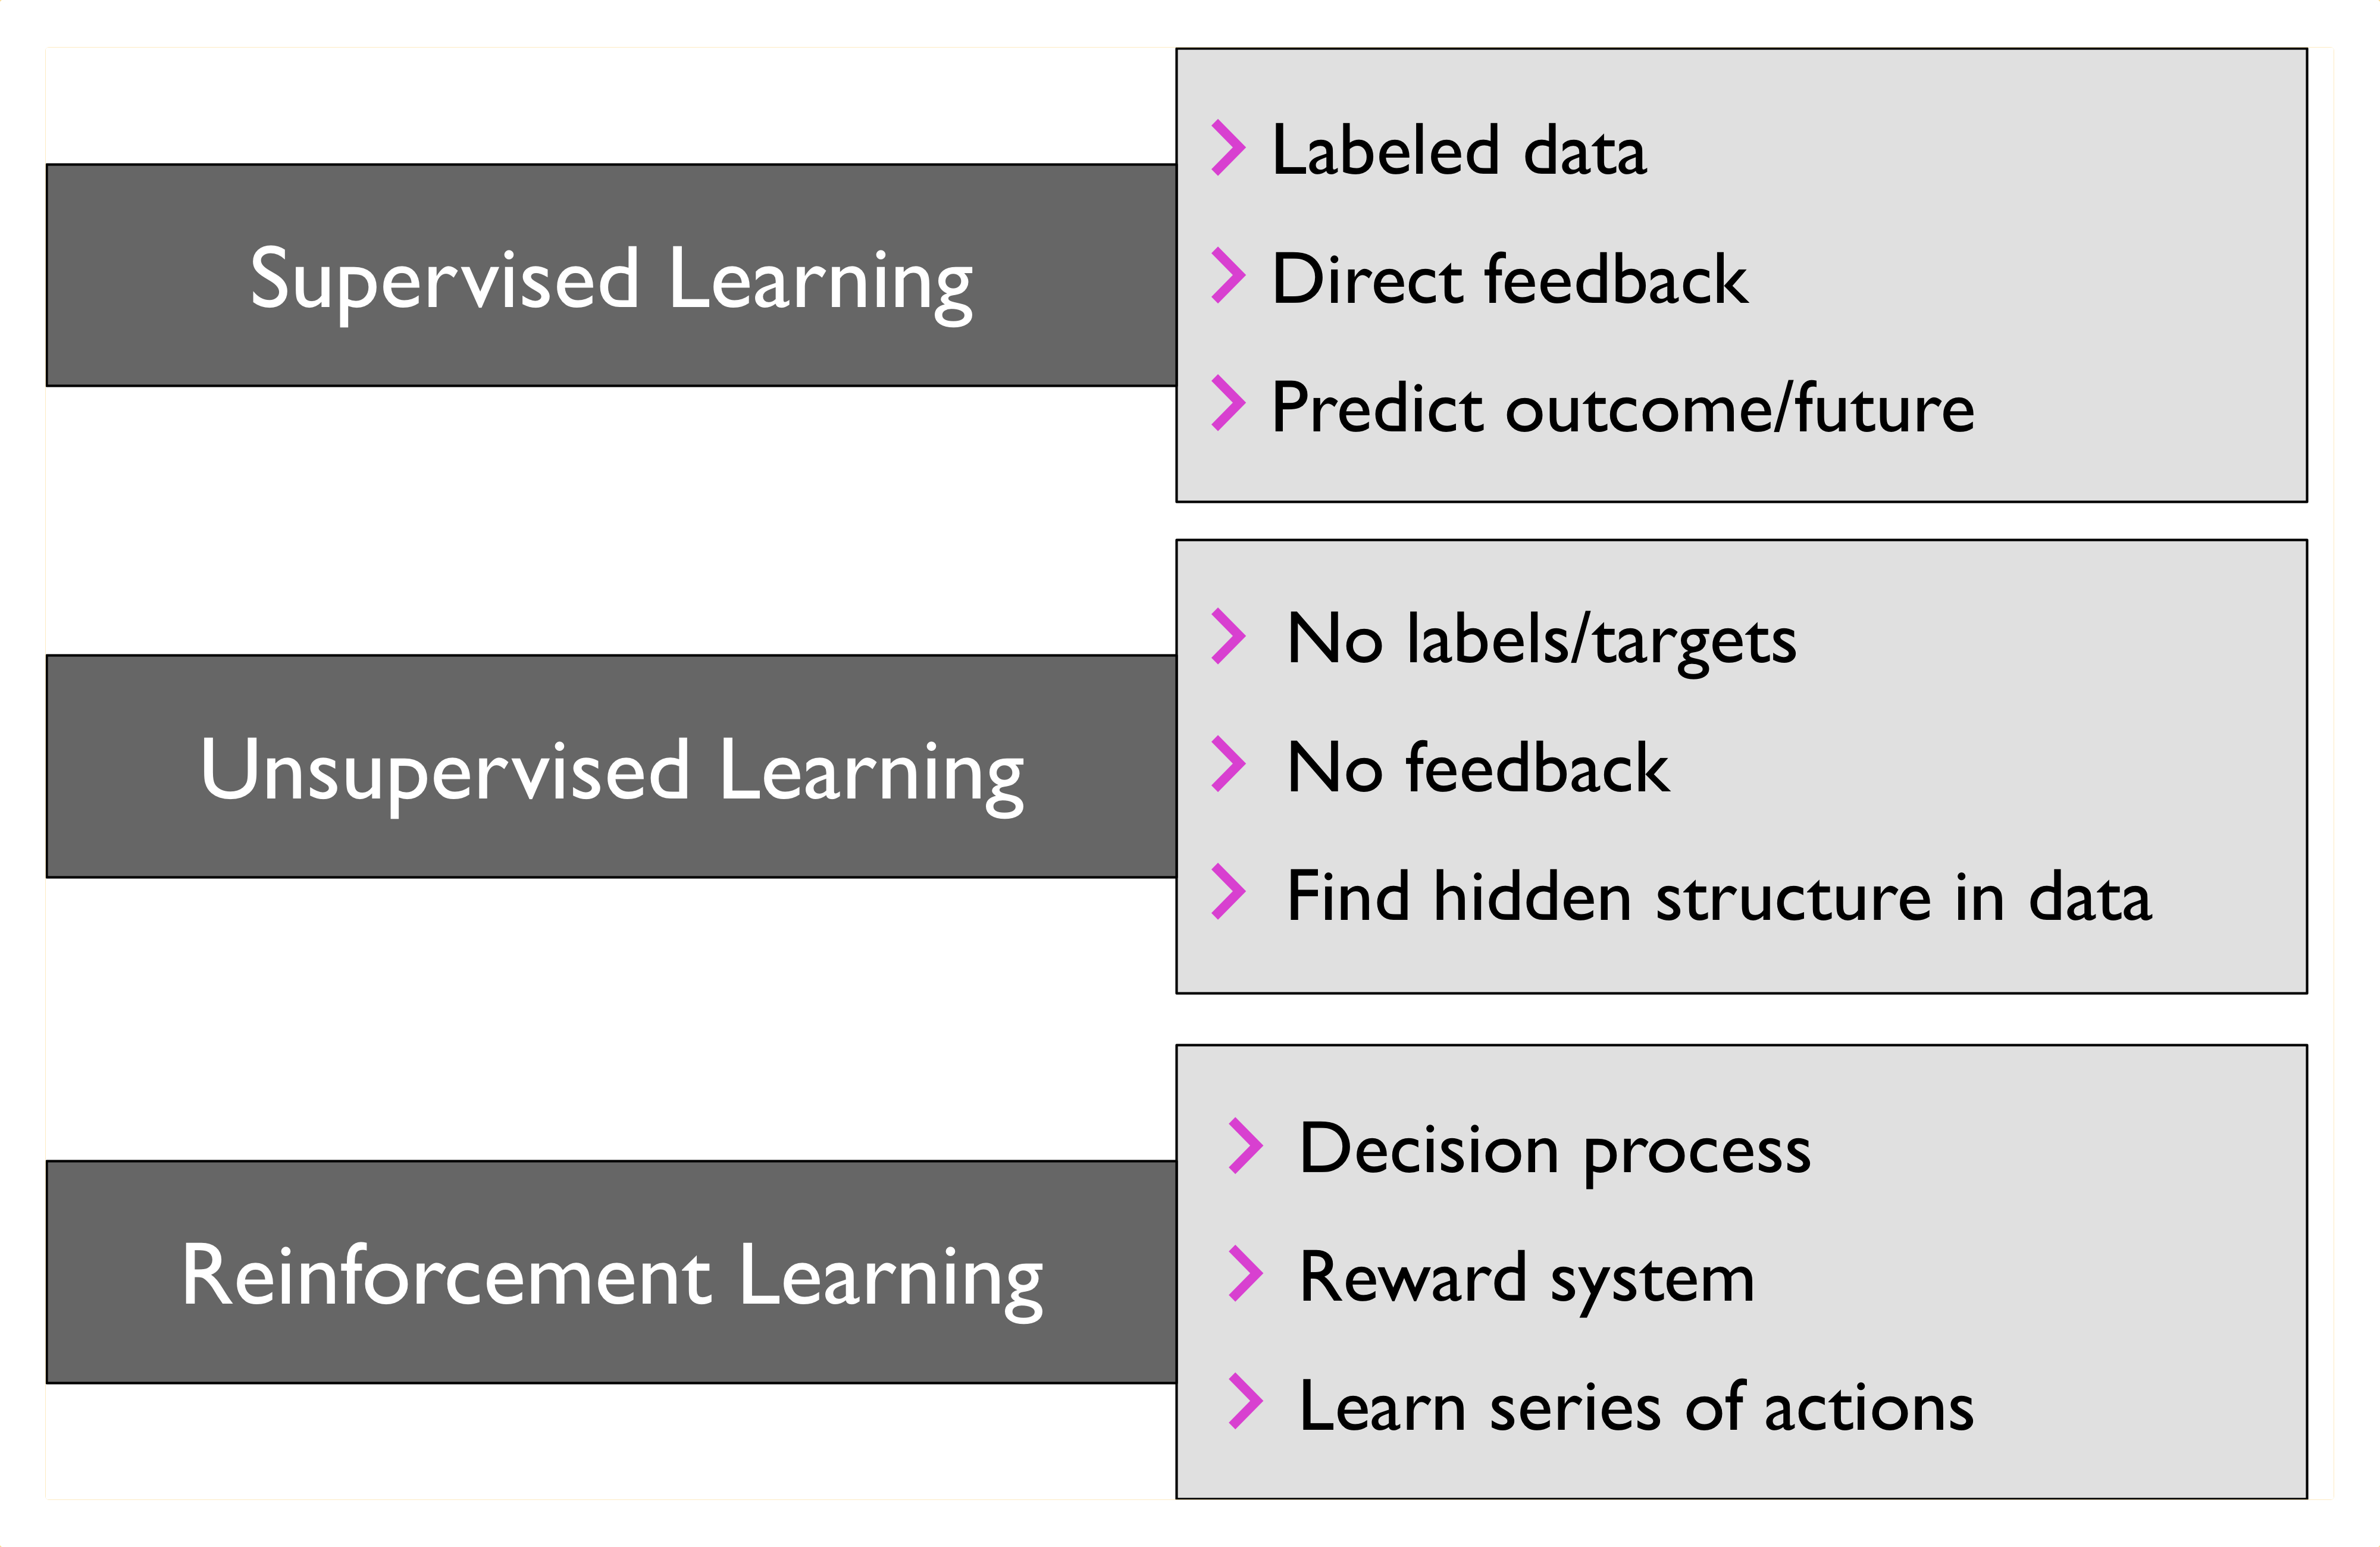

In [2]:
Image(filename="images/01_01.png",width=500)

## What is Supervised Learning?

In Supervised Learning, the machine learns under supervision. It contains a model that is able to predict with the help of a labeled dataset. A labeled dataset is one where you already know the target answer. 

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/supervised-learning.png">

In this case, we have images that are labeled a spoon or a knife. This known data is fed to the machine, which analyzes and learns the association of these images based on its features such as shape, size, sharpness, etc. Now when a new image is fed to the machine without any label, the machine is able to predict accurately that it is a spoon with the help of the past data.

Supervised learning can be further divided into two types:

1. Classification
2. Regression

## What is Unsupervised Learning?
In Unsupervised Learning, the machine uses unlabeled data and learns on itself without any supervision. The machine tries to find a pattern in the unlabeled data and gives a response.

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/unsupervised-machine-learning.png">

Unsupervised learning can be further grouped into types:

1. Clustering
2. Association

## Difference Between Supervised and Unsupervised Learning

<table><tbody>
<tr>
<td>
<p><strong>Supervised Learning</strong></p>
</td>
<td>
<p><strong>Unsupervised Learning</strong></p>
</td>
</tr>
<tr>
<td>
<p>It uses known and labeled data as input</p>
</td>
<td>
<p>It uses unlabeled data as input</p>
</td>
</tr>
<tr>
<td>
<p>It has a feedback mechanism&nbsp;</p>
</td>
<td>
<p>It has no feedback mechanism</p>
</td>
</tr>
<tr>
<td>
<p>The most commonly used supervised learning algorithms are:</p>
<ul>
<li>Decision tree</li>
<li>Logistic regression</li>
<li>Support vector machine</li>
</ul>
</td>
<td>
<p>The most commonly used unsupervised learning algorithms are:&nbsp;</p>
<ul>
<li>K-means clustering</li>
<li>Hierarchical clustering</li>
<li>Apriori algorithm</li>
</ul>
</td>
</tr>
</tbody></table>

## Choosing the right estimator

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

Different estimators are better suited for different types of data and different problems.


<img src="https://scikit-learn.org/stable/_static/ml_map.png" width=1200>

In machine learning, Classification is used to split data into categories. But after cleaning and preprocessing the data and training our model, how do we know if our classification model performs well? That is where a confusion matrix comes into the picture. 

A confusion matrix is used to measure the performance of a classifier in depth. In this simple guide to Confusion Matrix, we will get to understand and learn confusion matrices better.

In [3]:
%matplotlib inline

# ✍🏻 MNIST dataset and performance measures

In this notebook, we would like to go through some of the ML algorithms. Precisely, we would like to evaluate and compare the following performance metrics :
- Confusion matrix
- Recall
- Precision
- FP Rate
- Specificity
- ROC curve

The measures will be taken on classification tasks on handwritten data.

The metrics will be implemented from scratch and will be compared to the metrics offered by the standard librairies *(scikit-learn)*.

🛑 KNN will be coded from scratch ! 



## Importing librairies

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

## Reading the data from the files


We're going to use a csv file that contain the data that we're going to read.

<h3> MNIST </h3>

These data are from the MNIST dataset.

The MNIST database is a large database of handwritten digits that is commonly used for training various image processing systems.

The MNIST *(Modified National Institute of Standards and Technology database)* database of **handwritten digits**, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

<center><img src="https://www.mdpi.com/applsci/applsci-09-03169/article_deploy/html/images/applsci-09-03169-g001.png" width=800></center>


MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits, such as:

<center><img src="images/mnist1.png"></center>




## 📊📂The training set (data & labels)

### 📜 Data

In [5]:
# data
X = np.genfromtxt('data/mnist_data.csv', delimiter=',', dtype=int)
X.shape

(5000, 400)

In our case, we have 5000 samples for training.

Each of the sample has **400 features**; in reality, this is a **20*20 pixels image** that we can reshape to vizualise.

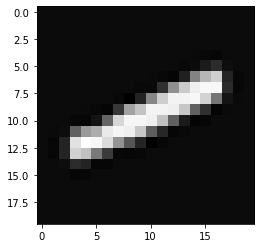

In [6]:
# X[600;:] means the 600th sample with all its features

digit = X[600,:].reshape((20, 20))
plt.imshow(digit,cmap='gray')

As we can see, this looks like a *1*, but it's inverted...
Let's flip the image (transpose the matrix)  to get what we want!

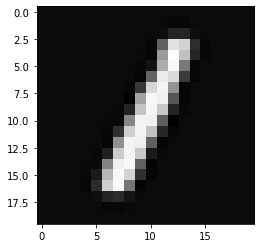

In [7]:
plt.imshow(digit.transpose(),cmap='gray')

Here, we can see a beautiful handwritten 1️⃣ !

### 🔖 Labels

In machine learning, data labeling is the process of identifying raw data (images, text files, videos, etc.) and adding one or more meaningful and informative labels to provide context so that a machine learning model can learn from it.

In our case, we have a csv file comprising of labels (from 1 to 10).

<center><img src="https://learningactors.com/wp-content/uploads/2017/08/10.png" ></center>

Let's dive into our ``labels.csv`` file and see how our labels look like :

In [8]:
y = np.genfromtxt('data/mnist_labels.csv', delimiter=',', dtype=int)
y.shape

(5000,)

These **5000 rows** correspond to each of the 5000 rows of the training set we saw earlier.

Let's, for the sake of this homework, do a statistical distribution of our data

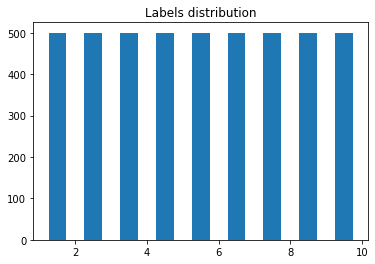

In [9]:
plt.hist(y, bins = np.arange(1,11),histtype='barstacked',align='mid',rwidth=0.5) 
plt.title("Labels distribution") 
plt.show()

We notice that we have a **lot of handwritten zeros**.

Let's plot some random data of our dataset 

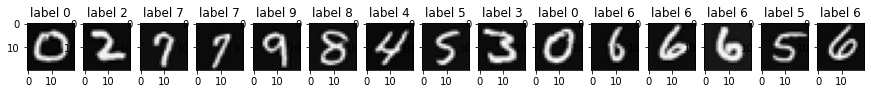

In [10]:
plt.figure(figsize=(15,8))

# This number represent the number of rows from data.csv we want to display (randomly)
nbr_queries = 15

for i in range(nbr_queries): 
    #The row we're fetching is never gonna be greater than X.shape[0] = 5000
    row = random.randint(X.shape[0])
    digit_image = X[row,:].reshape((20, 20)).transpose()
    plt.subplot(1,nbr_queries,i+1)
    plt.title('label '+ str(y[row]))
    plt.imshow(digit_image,cmap='gray')

By convention, **label 10** corresponds to **0**. This is used in order to facilitate heavy computations if we using matlab (the dataset was used there).

In order to fix this, let's go ahead and change the label 10 and turn it to 0.

# 📉 Performance measures

In this part, we're going to define the general performance measures all along with **their implementation from scratch**.

<h3> What Are Confusion Matrices, and Why Do We Need Them? </h3>


Classification Models have multiple categorical outputs. Most error measures will calculate the total error in our model, but we cannot find individual instances of errors in our model. The model might misclassify some categories more than others, but we cannot see this using a standard accuracy measure.

Furthermore, suppose there is a significant class imbalance in the given data. In that case, i.e., a class has more instances of data than the other classes, a model might predict the majority class for all cases and have a high accuracy score; when it is not predicting the minority classes. This is where confusion matrices are useful.

A confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes.

It plots a table of all the predicted and actual values of a classifier.

<center><img src="https://www.nbshare.io/static/snapshots/cm_colored_1-min.png" width=800></center>

<h4>False Positives (FP-Type 1 error) vs False Negatives (FN-Type 2 error)</h4>

<center><img src="https://www.nbshare.io/static/snapshots/Precisionrecall_2-min.png" width=400></center>

**a Type 1 error** is the rejection of the null hypothesis when it is actually true

**a Type 2 error** is the acceptance of the null hypothesis when it is actually false.  (Some statisticians prefer to say “failure to reject” rather than “accept” the null hypothesis for Type 2 errors.)


**A Type 1 error** is also known as a false positive, and **a Type 2 error** is also known as a false negative.  This nomenclature comes from the conventional connotation of

the null hypothesis as the “negative” or the “boring” result
the alternative hypothesis as the “positive” or “exciting” result.

### ⚫ Confusion Matrix

 In our case, we have 10 classes, so the matrix is 10*10.

 The matrix will look like this one :
 
<center><img src="https://www.researchgate.net/profile/Alejandro-Baldominos/publication/328816477/figure/fig3/AS:703352962809858@1544703822325/Confusion-matrix-for-the-MNIST-dataset-with-the-best-ensemble.png"></center>

In [11]:
def confusion_matrix(actual_values, predicted_values):
   """
   Compute confusion matrix to evaluate the accuracy of a classification.
   
   Parameters:
   actual_values : array-like of shape (n_samples,)
   Ground truth (correct) target values.

   predicted_values :array-like of shape (n_samples,)
   Estimated targets as returned by a classifier.
   
   Returns:
   
   C: ndarray of shape (n_classes, n_classes)
   Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label 
   being j-th class.
   """
   cm = np.zeros((10,10))
   for i in range(len(actual_values)):
      cm[actual_values[i]-1][predicted_values[i]-1] += 1
      
   return cm.astype(np.int64)

Now, we got our confusion matrix.

In order to compute the main performance measure, we need to extract from that matrix the FP,FN, TP and TN.

<center><img src="https://i.stack.imgur.com/AuTKP.png"></center>


In [12]:
def get_parameters(confusion_matrix,n_class): 
  """
  Returns a (TP,FP,FN,TN) tuple for each class given.
  """
  TP = confusion_matrix[n_class-1][n_class-1]
  FP = confusion_matrix[:,n_class-1].sum() - TP
  FN = confusion_matrix[n_class-1,:].sum() - TP
  TN = np.sum(confusion_matrix) - (FP + FN + TP)
  return (TP,FP,FN,TN)

In [13]:
conf_mat = confusion_matrix([1,2,3,8,8,4],[1,2,8,8,8,6])
conf_mat 

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [14]:
get_parameters(conf_mat,7)

(0, 0, 0, 6)

#### Main metrics

<center><img src="images/main_metrics.png"></center>

### ⚫ Accuracy

How many values did we predict correctly? How many true predictions out of all samples there are?

<center><img src="https://www.nbshare.io/static/snapshots/Accuracy_3-min.png"></center>

In [15]:
# To-Do : compute the accuracy
def accuracy(confusion_matrix,n_class):
  TP,_,_,TN = get_parameters(confusion_matrix,n_class)
  return TP+TN/np.sum(conf_mat)

### ⚫ Precision

**Precision is used to calculate the model's ability to classify positive values correctly. It is the true positives divided by the total number of predicted positive values.** Example - If you predicted that 100 patients would catch Covid-19, but only 90 of patients actually got covid, then your precision is 90%. So out of all predicted positives (true positive and false positive) how many are actually true positive(tp)?

<center><img src="https://www.nbshare.io/static/snapshots/precision_5-min.png"></center>

In [16]:

def precision(confusion_matrix,n_class):
  TP,FP,_,_ = get_parameters(confusion_matrix,n_class)
  return TP/(TP+FP)
  

### ⚫ Recall Sensitivity 

**It is used to calculate the model's ability to predict positive values. "How often does the model predict the correct positive values?"**

<center><img src="https://miro.medium.com/max/472/1*Jr5SEZgQ37gr6JKBDT8V1g.png"></center>

In [17]:
#To-Do
def recall(confusion_matrix,n_class):
  TP,_,FN,_ = get_parameters(confusion_matrix,n_class)
  return TP/(TP+FN)
  

### ⚫ Specificity  *(True Negative Rate)*

**Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative).** This implies that there will be another proportion of actual negative, which got predicted as positive and could be termed as false positives. This proportion could also be called a false positive rate.

<center><img src="https://editor.analyticsvidhya.com/uploads/61426Screenshot%202021-06-16%20075939.jpg" width=300></center>

In [18]:
#To-Do
def specificity(confusion_matrix,n_class):
  _,FP,_,TN = get_parameters(confusion_matrix,n_class)
  return TN/(TN+FP)

### ⚫ False Positive Rate *(Fall out)*

**FPR (ranges from 0 to 1, lower is better) is the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events.**


In [19]:
#To-Do
def fpr(confusion_matrix,n_class):
  _,FP,_,TN = get_parameters(confusion_matrix,n_class)
  return FP/(FP+TN)

### ⚫ ROC Curve



In [20]:
plt.figure(figsize = (25,10))

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

In [21]:
def ROC_Curve(proba,y_pred,n_class):
    thresholds = np.linspace(0,1,num=100)
    fprs = []
    tprs = []

    label_class = 'Class {}'.format(n_class)
        
    for value in thresholds:
            pred = (proba[:,n_class] >= value).astype(bool)

            TP = (y_pred[pred]==n_class).sum()
            FP = (y_pred[pred]!=n_class).sum()
            TN = (y_pred[np.logical_not(pred)]!=n_class).sum();
            FN = (y_pred[np.logical_not(pred)]==n_class).sum()

            fprs = fprs + [FP/(FP+TN)]
            tprs = tprs + [TP/(TP+FN)]
        
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot(fprs,tprs,label=label_class,linewidth=0.4)
    plt.legend()
        

In [22]:
def ROC_Curve(proba,y_pred):
    thresholds = np.linspace(0,1,num=100)
    fprs = []
    tprs = []
    for n_class in range(10):
        r = random.random()
        b = random.random()
        g = random.random()
        label_class = 'Class {}'.format(n_class)
        color = (r, g, b)
        
        for value in thresholds:
            pred = (proba[:,n_class] >= value).astype(bool)

            TP = (y_pred[pred]==n_class).sum()
            FP = (y_pred[pred]!=n_class).sum()
            TN = (y_pred[np.logical_not(pred)]!=n_class).sum();
            FN = (y_pred[np.logical_not(pred)]==n_class).sum()

            fprs = fprs + [FP/(FP+TN)]
            tprs = tprs + [TP/(TP+FN)]
        
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.plot(fprs,tprs,label=label_class,c=color,linewidth=0.4)
        plt.legend()
        

### 🧪 Building the confusion matrix class

In [23]:
class ConfusionMatrix():
  def __init__(self,actual_values, predicted_values):
    self.confusion_matrix = self.make_confusion_matrix(actual_values,predicted_values)
    self.total_samples = np.sum(self.confusion_matrix) # The sum of the confusion matrix represents the size of the samples
    
  def make_confusion_matrix(self,actual_values, predicted_values):
      """
      Compute confusion matrix to evaluate the accuracy of a classification.

      Parameters:
      actual_values : array-like of shape (n_samples,)
      Ground truth (correct) target values.   
      predicted_values :array-like of shape (n_samples,)
      Estimated targets as returned by a classifier.

      Returns:

      C: ndarray of shape (n_classes, n_classes)
      Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label 
      being j-th class.
      """   
      if len(actual_values) != len(predicted_values):
        raise ValueError('Actual values vector must have the same size as Predicted Values vector!')
      
      confusion_matrix = np.zeros((10,10),dtype=np.int64)
      for i in range(len(actual_values)):
         confusion_matrix[actual_values[i]-1][predicted_values[i]-1] += 1
         
      
      return confusion_matrix
  
  def get_parameters(self,n_class): 
    """
    Returns a (n_class,TP,FP,FN,TN) tuple for each class given.
    """
    TP = self.confusion_matrix[n_class-1][n_class-1]
    FP = self.confusion_matrix[:,n_class-1].sum() - TP
    FN = self.confusion_matrix[n_class-1,:].sum() - TP
    TN = np.sum(self.confusion_matrix) - (FP + FN + TP)
    return ('Class {}'.format(n_class),TP,FP,FN,TN)

  
  def accuracy(self,n_class):
    """
    Values predicted correctly. (TP and TN)
    """
    _,TP,_,_,TN = self.get_parameters(n_class)
    return (TP+TN)/self.total_samples
  
  
  def precision(self,n_class):
    """
    How accurate the positive predictions are.
    """
    _,TP,FP,_,_  =self.get_parameters(n_class)
    return TP/(TP+FP)

  
  def recall(self,n_class): 
    """
    Returns a metric that quantifies the number of correct positive predictions made out of all 
    positive predictions that could have been made.
    Equivalent to True Positive Rate (TPR).
    
    Coverage of actual positive sample.
    """
    _,TP,_,FN,_ =self.get_parameters(n_class)
    return TP/(TP+FN)

  
  def specificity(self,n_class):
    """
    Coverage of actual negative sample. Eqsui
    """
    _,_,FP,_,TN =self.get_parameters(n_class)
    return TN/(TN+FP)

   
  def fpr(self,n_class):
    """
    Calculation of percentage of how many times a prediction is correct out of total predictions.
    """
    _,_,FP,_,TN =self.get_parameters(n_class)
    return FP/(FP+TN)
  
    
  
  def get_metrics(self,n_class):
    _,TP,FP,FN,TN =self.get_parameters(n_class)
    accuracy, precision, recall = (TP+TN)/self.total_samples,TP/(TP+FP),TP/(TP+FN)
    specificity, fpr = TN/(TN+FP),FP/(FP+TN)
    
    print("""
          * Class {}
            accuracy     {:.8f}
            precision    {:.8f}
            recall       {:.8f}
            specificity  {:.8f}
            fpr          {:.8f}
            """.format(n_class,accuracy,precision,recall,specificity,fpr))
    
    return accuracy, precision, recall,specificity, fpr

Let's try it on some dummy data.

In [24]:
cm = ConfusionMatrix([1,2,3,8,8,4,4,4,4],[1,2,8,8,8,6,4,4,4])

In [25]:
cm.confusion_matrix

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 3, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [26]:
cm.get_metrics(8)


          * Class 8
            accuracy     0.88888889
            precision    0.66666667
            recall       1.00000000
            specificity  0.85714286
            fpr          0.14285714
            


(0.8888888888888888,
 0.6666666666666666,
 1.0,
 0.8571428571428571,
 0.14285714285714285)

In [27]:
cm.get_parameters(n_class=1)

('Class 1', 1, 0, 0, 8)

In [28]:
cm.accuracy(n_class=8)

0.8888888888888888

In [29]:
cm.get_metrics(n_class=4)


          * Class 4
            accuracy     0.88888889
            precision    1.00000000
            recall       0.75000000
            specificity  1.00000000
            fpr          0.00000000
            


(0.8888888888888888, 1.0, 0.75, 1.0, 0.0)

# 📒 Classification algorithms

In machine learning, classification refers to a predictive modeling problem where a class label is predicted for a given example of input data.

Examples of classification problems include:

- Given an example, classify if it is spam or not.

- Given a handwritten character, classify it as one of the known characters.

- Given recent user behavior, classify as churn or not.

<center><img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/11/classification.png" width=400></center>

From a modeling perspective, classification requires a training dataset with many examples of inputs and outputs from which to learn.

A model will use the training dataset and will calculate how to best map examples of input data to specific class labels. As such, the training dataset must be sufficiently representative of the problem and have many examples of each class label.


<h3> 📋Classification Terminologies In Machine Learning</h3>

 **Classifier** - It is an algorithm that is used to map the input data to a specific category.

**Classification Model** - The model predicts or draws a conclusion to the input data given for training, it will predict the class or category for the data.

**Feature** – A feature is an individual measurable property of the phenomenon being observed.

**Binary  Classification** – It is a type of classification with two outcomes, for eg – either true or false.

**Multi-Class Classification** – The classification with more than two classes, in multi-class classification each sample is assigned to one and only one label or target.

**Multi-label Classification** – This is a type of classification where each sample is assigned to a set of labels or targets.

**Initialize** – It is to assign the classifier to be used for the model.

**Train the Classifier** – Each classifier in sci-kit learn uses the fit(X, y) method to fit the model for training the train X and train label y.

**Predict the Target** – For an unlabeled observation X, the predict(X) method returns predicted label y.

**Evaluate** – This basically means the evaluation of the model i.e classification report, accuracy score, etc.


<h3> 🎯 Types Of Learners In Classification </h3>

- **Lazy Learners** – Lazy learners simply store the training data and wait until a testing data appears. The classification is done using the most related data in the stored training data. They have more predicting time compared to eager learners. Eg – k-nearest neighbor, case-based reasoning.

- **Eager Learners** – Eager learners construct a classification model based on the given training data before getting data for predictions. It must be able to commit to a single hypothesis that will work for the entire space. Due to this, they take a lot of time in training and less time for a prediction. Eg – Decision Tree, Naive Bayes, Artificial Neural Networks.

In [30]:
# %pip install -U scikit-learn

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

## 🔪 Splitting the dataset

**Training data** is a set of samples (such as a collection of photos or videos, a set of texts or audio files, etc.) with assigned relevant and comprehensive labels (classes or tags) used to fit the parameters (weights) of a machine learning model with the goal of training it by example.

<center><img src="https://labelyourdata.com/img/article-illustrations/training-data.png" width=800></center>


Training data and test data sets are two different but important parts in machine learning. While training data is necessary to teach an ML algorithm, testing data, as the name suggests, helps you to validate the progress of the algorithm's training and adjust or optimize it for improved results.


<center><img src="https://labelyourdata.com/img/article-illustrations/training-data-testing-data.png" width=800></center>

In our case, the training set comprised of images of handwritten numbers and their correponding labels.

In [32]:
from sklearn.model_selection import train_test_split

First, we need to define our training set (X_train,y_train) and testing set (X_test,y_test).

There are different methods for splitting the dataset, the most common following the Pareto ratio of 80:20 or sometimes 70:30.

There are, of course, more sophisticated splitting methods but usually, the simple 80:20 ratio suffices.

#### Train & Test Split implementation from scratch

In [33]:
def train_test_split_scratch(X,y,tRatio=2/3):
  # implementer la division
  Xt = np.empty((0,400),int)
  Yt = np.empty((0,),int)
  Xtt = np.empty((0,400),int);Ytt = np.empty((0,),int)
  for i in range (1,11):
    XX = X[y==i];YY = y[y==i]
    Xt = np.append(Xt,XX[0:int(XX.shape[0]*tRatio)],axis=0)
    Yt = np.append(Yt,YY[0:int(YY.shape[0]*tRatio)],axis=0)
    Xtt = np.append(Xtt,XX[int(XX.shape[0]*tRatio):],axis=0)
    Ytt = np.append(Ytt,YY[int(YY.shape[0]*tRatio):],axis=0)
    return Xt,Yt,Xtt,Ytt

In [34]:
train_ratio = 2/3
test_ratio = 1/3

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio,train_size=train_ratio, random_state=42)

In [36]:
X_train.shape,X_test.shape

((3333, 400), (1667, 400))

## 🏠 K-Nearest Neighbors

It is a lazy learning algorithm that stores all instances corresponding to training data in n-dimensional space. It is a lazy learning algorithm as it does not focus on constructing a general internal model, instead, it works on storing instances of training data.

<center><img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/11/knn.png"></center>

* Classification is computed from a simple majority vote of the k nearest neighbors of each point. It is supervised and takes a bunch of labeled points and uses them to label other points. To label a new point, it looks at the labeled points closest to that new point also known as its nearest neighbors. It has those neighbors vote, so whichever label most of the neighbors have is the label for the new point. The “k” is the number of neighbors it checks.

* Similarity between records can be measured many different ways. A problem or data-specific method can be used. Generally, with tabular data, a good starting point is the **Euclidean distance**.

The k-Nearest Neighbors algorithm is broken down into 3 parts:

- **Step 1**: Calculate Euclidean Distance.
- **Step 2**: Get Nearest Neighbors.
- **Step 3**: Make Predictions.


### KNN : class implementation

Let's first define a measure to compute the similarity between records.
There are many ways to compute a distance between vectors $p$ and $q$, in our case, we work with the *Euclidian Distance* defined as :

<center><img src="https://neo4j.com/docs/graph-data-science/current/_images/euclidean.png"></center>

In [37]:
import numpy as np
from collections import Counter

In [38]:
def euclidian_distance(x1,x2):
  """
  Returns the euclidian distance between two vectors.
  """
  return np.sqrt(np.sum((x1-x2)**2))

In [39]:
class KNN:
  def __init__(self,k=3):
    self.k = k
    
  def fit(self,X,y):
    """
    Parameters:
    X : features 
    y : labels
    
    Returns: None
    Stores the training samples.
    """
    self.X_train = X
    self.y_train = y
  
  def predict(self, X):
    """
    Parameters:
    X : multiple unknown samples.
    
    Returns :
    A list of predicted labels corresponding to X.
    """
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)
  
  def _predict(self,x):
    """
    - Step 1: Calculate Euclidean Distance.
    - Step 2: Get Nearest Neighbors.
    - Step 3: Make Predictions.
    """
    
    #compute the euclidian distance from x to EACH of the vectors of our 
    #training set. This will return an array of distances.
    distances = [euclidian_distance(x, x_train) for x_train in self.X_train]
    
    # We will then sort our distances array. The argsort() method will return the indices
    # of the k first corresponding sorted values. That's why we use a slice list. We just
    # want to select the k nearest neighbors.
    k_indices = np.argsort(distances)[:self.k]
    
    # In order to get the corresponding labels, we can extract them using the 
    # k_indices we got from the argsort() method.
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    
    # Here, we do the vote by selecting the MOST common class label. For this
    # We use the Counter module (Collections) using the most_common() method.
    # More details on this on the next cell.
    most_common = Counter(k_nearest_labels).most_common(n=1) 
    return most_common[0][0]

<h5> Counter module : most_common() method </h5>

In [40]:
a = [1, 1,1,2,1,1,3,4,4,5]
most_common = Counter(a).most_common(1)
most_common

[(1, 5)]

### KNN : function implementation (Omar Salhi)

In [41]:
import math

def distance(a,b):
    return(math.sqrt(((a-b)**2).sum()))


def moinsProche(K,ppv,x):
    i = 0;j=1
    mini = distance(x,ppv[0])
    while(j<K):
        if(distance(x,ppv[j])>mini):
            mini = distance(x,ppv[j])
            i = j
        j=j+1
    return(mini,i)


def KPP(K,x, X, Y):
    K = min(K,X.shape[0])
    ppv = X[0:K]
    eppv= Y[0:K]
    disMP,MP = moinsProche(K,ppv,x)
    for t in range(K,X.shape[0]):
        if(distance(x,X[t])<disMP):
            ppv[MP]=X[t]
            eppv[MP]=Y[t]
            disMP,MP = moinsProche(K,ppv,x)
    nums = np.zeros(11)
    for t in eppv:
        nums[t]=nums[t]+1
    mx = max(nums)
    for t in range(0,11):
        if(nums[t]==mx):
            return(t)

#### Testing Omar's version

In [42]:
import time

In [43]:
start = time.time()
PredKNN = []
for i in X_test:
  PredKNN = PredKNN + [KPP(5,i,X_train,y_train)]
PredKNN = np.array(PredKNN)
print('Time spent: %0.2fs' % (time.time()-start))

Time spent: 18.49s


🔨 This implementation is more efficient than the class one !

In [44]:
ConfMKNN = ConfusionMatrix(y_test,PredKNN)
for i in range(0,10):
  ConfMKNN.get_metrics(i)


          * Class 0
            accuracy     0.99520096
            precision    0.96296296
            recall       0.99453552
            specificity  0.99528302
            fpr          0.00471698
            

          * Class 1
            accuracy     0.98740252
            precision    0.90000000
            recall       0.98181818
            specificity  0.98801598
            fpr          0.01198402
            

          * Class 2
            accuracy     0.98800240
            precision    0.98125000
            recall       0.90229885
            specificity  0.99799062
            fpr          0.00200938
            

          * Class 3
            accuracy     0.98380324
            precision    0.92441860
            recall       0.91907514
            specificity  0.99129853
            fpr          0.00870147
            

          * Class 4
            accuracy     0.98620276
            precision    0.96202532
            recall       0.89940828
            spe

Let's look at our confusion matrix :  

In [45]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})

<AxesSubplot:>

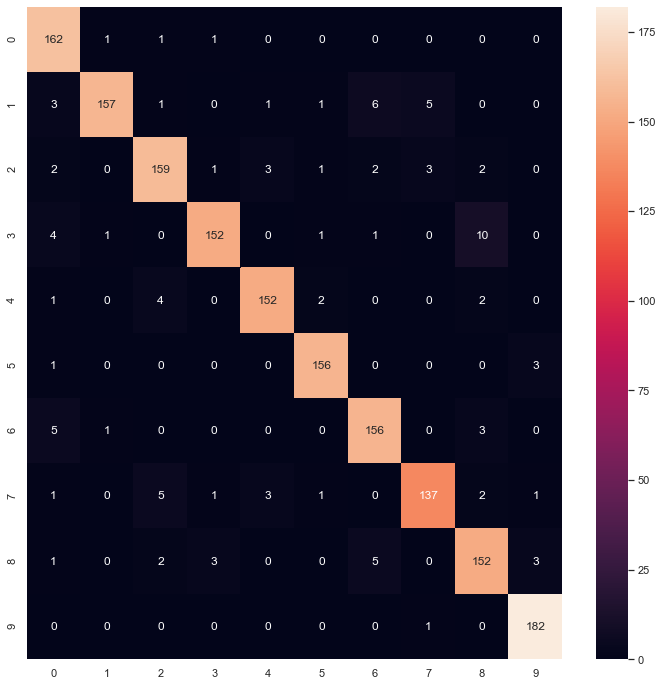

In [46]:
sns.heatmap(ConfMKNN.confusion_matrix,cbar=True,fmt="d",annot=True)

#### Class-version KNN test 

In [47]:
knn_model = KNN(k=5)
knn_model.fit(X_train,y_train)

In [48]:
start = time.time()
predictions = knn_model.predict(y_test)
print('Time spent: %0.2fs' % (time.time()-start))

Time spent: 31.54s


In [49]:
cm_knn = ConfusionMatrix(y_test,predictions)
for i in range(0,10):
  print("""
          * Class {}
            accuracy     : {:.8f}
            precision    : {:.8f}
            recall       : {:.8f}
            specificity  : {:.8f}
            fpr          : {:.8f}
            """.format(i,ConfMKNN.accuracy(i),ConfMKNN.precision(i),ConfMKNN.recall(i),ConfMKNN.specificity(i),ConfMKNN.fpr(i)))


          * Class 0
            accuracy     : 0.99520096
            precision    : 0.96296296
            recall       : 0.99453552
            specificity  : 0.99528302
            fpr          : 0.00471698
            

          * Class 1
            accuracy     : 0.98740252
            precision    : 0.90000000
            recall       : 0.98181818
            specificity  : 0.98801598
            fpr          : 0.01198402
            

          * Class 2
            accuracy     : 0.98800240
            precision    : 0.98125000
            recall       : 0.90229885
            specificity  : 0.99799062
            fpr          : 0.00200938
            

          * Class 3
            accuracy     : 0.98380324
            precision    : 0.92441860
            recall       : 0.91907514
            specificity  : 0.99129853
            fpr          : 0.00870147
            

          * Class 4
            accuracy     : 0.98620276
            precision    : 0.96202532
       

## 🎰 Support Vector Machine 

In [50]:
sns.reset_orig()

In [51]:
#Créer le modèle
model = svm.SVC(kernel='linear') 
# entrainement 
model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)

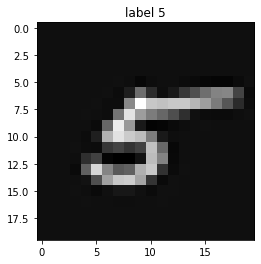

In [52]:
# tester une image
c = 1
y_pred[c]
a = X_test[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(y_test[c]))
plt.imshow(a,cmap='gray')

In [53]:
ConfMSVM = ConfusionMatrix(y_test,y_pred)
for i in range(0,10):
  print("""
          * Class {}
            accuracy     : {:.8f}
            precision    : {:.8f}
            recall       : {:.8f}
            specificity  : {:.8f}
            fpr          : {:.8f}
            """.format(i,ConfMKNN.accuracy(i),ConfMKNN.precision(i),ConfMKNN.recall(i),ConfMKNN.specificity(i),ConfMKNN.fpr(i)))


          * Class 0
            accuracy     : 0.99520096
            precision    : 0.96296296
            recall       : 0.99453552
            specificity  : 0.99528302
            fpr          : 0.00471698
            

          * Class 1
            accuracy     : 0.98740252
            precision    : 0.90000000
            recall       : 0.98181818
            specificity  : 0.98801598
            fpr          : 0.01198402
            

          * Class 2
            accuracy     : 0.98800240
            precision    : 0.98125000
            recall       : 0.90229885
            specificity  : 0.99799062
            fpr          : 0.00200938
            

          * Class 3
            accuracy     : 0.98380324
            precision    : 0.92441860
            recall       : 0.91907514
            specificity  : 0.99129853
            fpr          : 0.00870147
            

          * Class 4
            accuracy     : 0.98620276
            precision    : 0.96202532
       

## 🌳 Decision Trees


In [54]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(X_train, y_train)
# Prediction
y_pred = model.predict(X_test)

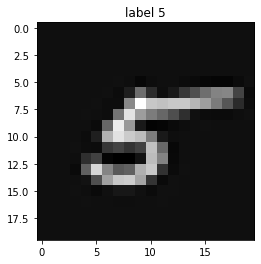

In [55]:
# tester une image
c= 1
y_pred[c]
a = X_test[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(y_test[c]))
plt.imshow(a,cmap='gray')

In [56]:
ConfMat_dTree = ConfusionMatrix(y_test,PredKNN)
for i in range(0,10):
    print("""
          * Class {}
            accuracy     : {:.8f}
            precision    : {:.8f}
            recall       : {:.8f}
            specificity  : {:.8f}
            fpr          : {:.8f}
            """.format(i,ConfMat_dTree.accuracy(i),ConfMat_dTree.precision(i),ConfMat_dTree.recall(i),ConfMat_dTree.specificity(i),ConfMat_dTree.fpr(i)))


          * Class 0
            accuracy     : 0.99520096
            precision    : 0.96296296
            recall       : 0.99453552
            specificity  : 0.99528302
            fpr          : 0.00471698
            

          * Class 1
            accuracy     : 0.98740252
            precision    : 0.90000000
            recall       : 0.98181818
            specificity  : 0.98801598
            fpr          : 0.01198402
            

          * Class 2
            accuracy     : 0.98800240
            precision    : 0.98125000
            recall       : 0.90229885
            specificity  : 0.99799062
            fpr          : 0.00200938
            

          * Class 3
            accuracy     : 0.98380324
            precision    : 0.92441860
            recall       : 0.91907514
            specificity  : 0.99129853
            fpr          : 0.00870147
            

          * Class 4
            accuracy     : 0.98620276
            precision    : 0.96202532
       

## 🧠 Neural Networks

### ⚙ Simple perceptron

In [57]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [58]:
# Choisir un image de test 
c=0

In [59]:
model.predict([Xtt[c,:]])

array([6])

In [60]:
# pour ROC, il faudra les probabilités:
model.predict_proba([Xtt[c,:]])

array([[0.11520853, 0.11707883, 0.11193702, 0.10492917, 0.11535856,
        0.11338006, 0.12409838, 0.02043518, 0.11761075, 0.05996354]])

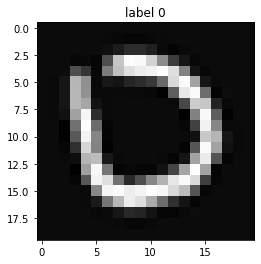

In [61]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

In [62]:
probs = model.predict_proba(Xtt)

In [63]:
probs

array([[1.15208528e-01, 1.17078827e-01, 1.11937016e-01, ...,
        2.04351808e-02, 1.17610750e-01, 5.99635406e-02],
       [7.50070667e-21, 1.07081286e-16, 6.60164087e-19, ...,
        5.16778316e-01, 1.23125161e-18, 4.75912528e-01],
       [2.27515379e-23, 1.05922017e-18, 3.49777775e-21, ...,
        5.54138480e-01, 7.00380578e-21, 4.42127809e-01],
       ...,
       [1.15208528e-01, 1.17078827e-01, 1.11937016e-01, ...,
        2.04351808e-02, 1.17610750e-01, 5.99635406e-02],
       [1.15208528e-01, 1.17078827e-01, 1.11937016e-01, ...,
        2.04351808e-02, 1.17610750e-01, 5.99635406e-02],
       [1.15208528e-01, 1.17078827e-01, 1.11937016e-01, ...,
        2.04351808e-02, 1.17610750e-01, 5.99635406e-02]])

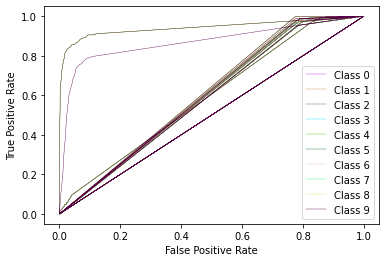

In [64]:
ROC_Curve(probs,Ytt)

### Deep Neural Networks

In [65]:
# Pour RNC
from sklearn.model_selection import KFold

In [66]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [67]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, y, random_state=0, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [68]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [69]:
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
model.fit(Xt_rncN, Yt_rnc, epochs=20)

Epoch 1/20
47/47 [==============================] - 0s 2ms/step - loss: 1.1792 - accuracy: 0.6060
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8700
Epoch 3/20
47/47 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.9060
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.9260
Epoch 5/20
47/47 [==============================] - 0s 2ms/step - loss: 0.2175 - accuracy: 0.9360
Epoch 6/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1844 - accuracy: 0.9473
Epoch 7/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9573
Epoch 8/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1098 - accuracy: 0.9680
Epoch 9/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.9633
Epoch 10/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9647
Epoch 11/20
47/47 [

In [71]:
# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)

In [72]:
print('accuracy :', acc)

accuracy : 0.9382857084274292


# References

1. https://machinelearningmastery.com/types-of-classification-in-machine-learning/#:~:text=In%20machine%20learning%2C%20classification%20refers,one%20of%20the%20known%20characters.
2. https://www.edureka.co/blog/classification-in-machine-learning/
3. https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks

